# Nuclear Power Stations

## Data
https://en.wikipedia.org/wiki/List_of_nuclear_power_stations

In [1]:
FULL_DATA = 'data/nuclear-stations-complete.csv'

## Global imports

In [2]:
%matplotlib inline
from IPython.core.pylabtools import figsize

In [3]:
%cd ..
from utils.colors import Colors
%cd nuclear-stations

C:\Users\USER\Dropbox\Projectos\data-viz
C:\Users\USER\Dropbox\Projectos\data-viz\nuclear-stations


## Load data

In [4]:
import csv


with open(FULL_DATA, 'r', encoding="utf-8") as f:
    reader = csv.DictReader(f, delimiter=';')
    nuclear_list = []
    for row in reader:
        nuclear_list.append({
            'name': row['name'],
            'short_name': row['short_name'],
            'country': row['country'], 
            'units': row['units'], 
            'capacity': row['capacity'],
            'coordinates': row['coordinates'],
            'latitude': row['latitude'],
            'longitude': row['longitude'],
            'coordinates_dms': row['coordinates_dms'],
            'status': row['status'],
            'notes': row['notes']
        })

## Plot using markers

In [5]:
def create_popup_text(data):
    """Creates HTML for the popup texts give a dictionary of data"""
    popup_text = f"""<strong>{data['short_name']}</strong> ({data['status']})<br>
                    <small>Country: {data['country']}<br>
                    Units: {data['units']}<br>
                    Capacity: {data['capacity']} MWe<br>
                    Coordinates: {data['coordinates_dms']}<br>
                    Notes: {data['notes']}</small>"""
    return popup_text

In [6]:
import folium


# Create map
m = folium.Map(
    location=[25, 10],
    zoom_start=2,
    min_zoom=2
)

# Add markers for each power station
for station in nuclear_list:
    if station['status'] == 'in service':
        folium.Marker(
            location=[station['latitude'], station['longitude']], 
            tooltip=station['name'],
            popup=create_popup_text(station),
            icon=folium.Icon(color='blue', prefix='fa', icon='circle')
        ).add_to(m)
    elif station['status'] == 'under construction':
        folium.Marker(
            location=[station['latitude'], station['longitude']], 
            tooltip=station['name'],
            popup=create_popup_text(station),
            icon=folium.Icon(color='gray', prefix='fa', icon='circle')
        ).add_to(m)
    elif station['status'] == 'shut down':
        folium.Marker(
            location=[station['latitude'], station['longitude']], 
            tooltip=station['name'],
            popup=create_popup_text(station),
            icon=folium.Icon(color='red', prefix='fa', icon='circle')
        ).add_to(m)

# Add legend
legend_html = """
     <div style="position: fixed; bottom: 25px; left: 25px; width: 150px; z-index:9999; font-size:14px;"">
     &nbsp; <i class="fa fa-map-marker fa-2x" style="color:#37A6D8"></i> In service<br>
     &nbsp; <i class="fa fa-map-marker fa-2x" style="color:#575757"></i> Under construction<br>
     &nbsp; <i class="fa fa-map-marker fa-2x" style="color:#D03C29"></i> Shut down</div>"""
m.get_root().html.add_child(folium.Element(legend_html))

# Save map
m.save('images/nuclear-stations-markers.html')

m

## Plot using circles

In [7]:
# Create map
m2 = folium.Map(
    location=[25, 10],
    zoom_start=2,
    min_zoom=2
)

# Add markers for each power station
for station in nuclear_list:
    if station['status'] == 'in service':
        folium.Circle(
            location=[station['latitude'], station['longitude']],
            tooltip=station['name'],
            popup=create_popup_text(station),
            radius=int(station['capacity'])*10,
            opacity=0.8,
            fill=True,
    #         fill_opacity=1
        ).add_to(m2)
        
    elif station['status'] == 'under construction':
        folium.Circle(
            location=[station['latitude'], station['longitude']],
            tooltip=station['name'],
            popup=create_popup_text(station),
            radius=int(station['capacity'])*10,
            opacity=0.8,
            color='gray',
            fill=True,
            fill_color='gray',
    #         fill_opacity=1
        ).add_to(m2)
    
    elif station['status'] == 'shut down':
        folium.Circle(
            location=[station['latitude'], station['longitude']],
            tooltip=station['name'],
            popup=create_popup_text(station),
            radius=int(station['capacity'])*10,
            opacity=0.8,
            color='red',
            fill=True,
            fill_color='red',
    #         fill_opacity=1
        ).add_to(m2)

# Add legend
legend_html2 = """
     <div style="position: fixed; bottom: 25px; left: 25px; width: 150px; z-index:9999; font-size:14px;"">
     &nbsp; <span style="height: 15px; width: 15px; background-color: #37A6D8; border-radius: 50%; display: inline-block;"></span> In service<br>
     &nbsp; <span style="height: 15px; width: 15px; background-color: #575757; border-radius: 50%; display: inline-block;"></span> Under construction<br>
     &nbsp; <span style="height: 15px; width: 15px; background-color: #D03C29; border-radius: 50%; display: inline-block;"></span> Shut down</div>"""
m2.get_root().html.add_child(folium.Element(legend_html2))


# Save map
m2.save('images/nuclear-stations.html')

m2

## Using Basemap lib

### Nuclear stations by status (World)

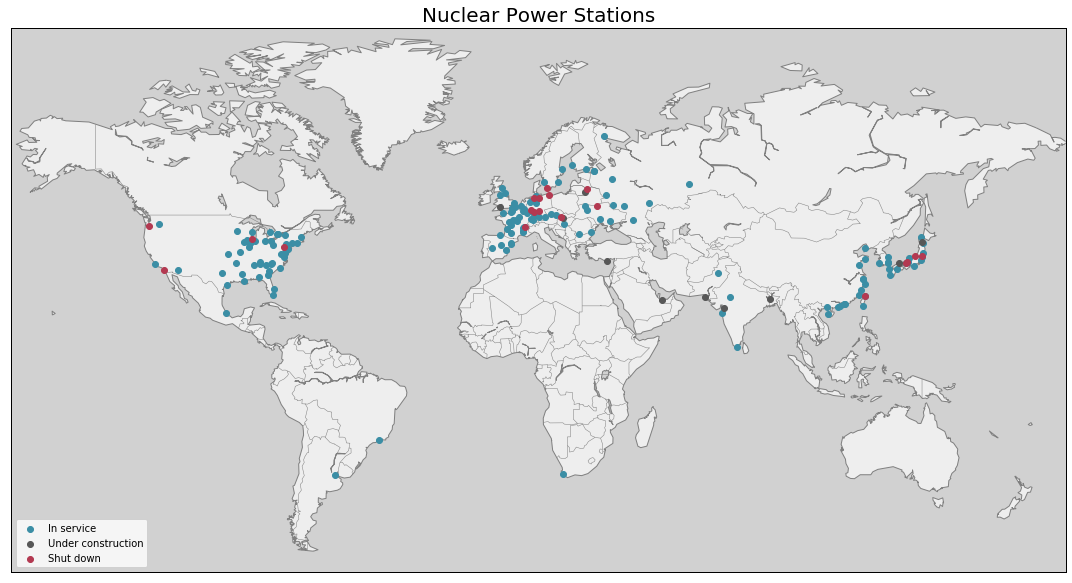

In [8]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


# Get longitudes and latitudes
lat, lon, cap = {}, {}, {}
for status in ['in service', 'under construction', 'shut down']:
    lon[status] = [float(x['longitude']) for x in nuclear_list if x['status'] == status]  # longitudes
    lat[status] = [float(y['latitude']) for y in nuclear_list if y['status'] == status]  # latitudes
    cap[status] = [float(z['capacity']) for z in nuclear_list if z['status'] == status]  # capacities

figsize(15,15)

# Draw map
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=85, llcrnrlon=-170, urcrnrlon=190, resolution='c')

# Draw map features
# m.shadedrelief()
m.fillcontinents(color='#EEEEEE',lake_color='#D1D1D1')
m.drawmapboundary(fill_color='#D1D1D1')
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')

plt.title("Nuclear Power Stations", fontsize=20);

m.scatter(lon['in service'], lat['in service'], latlon=True, label='In service', color=Colors.evidentia_blue, zorder=10);
m.scatter(lon['under construction'], lat['under construction'], latlon=True, label='Under construction', color='#575757', zorder=10);
m.scatter(lon['shut down'], lat['shut down'], latlon=True, label='Shut down', color=Colors.evidentia_red, zorder=10);

plt.legend(loc='lower left');
plt.tight_layout()

# Save map
plt.savefig('images/world.png', bbox_inches='tight')

### Nuclear stations by status (Europe)

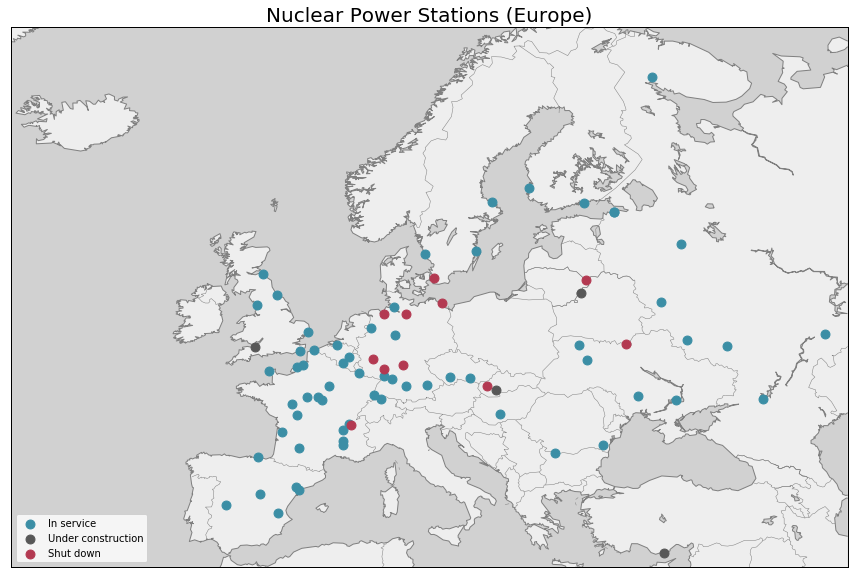

In [9]:
figsize(15,15)

# Draw map
m = Basemap(projection='mill', llcrnrlat=35, urcrnrlat=70, llcrnrlon=-25, urcrnrlon=50, resolution='l')

# Draw map features
# m.shadedrelief()
m.fillcontinents(color='#EEEEEE',lake_color='#D1D1D1')
m.drawmapboundary(fill_color='#D1D1D1')
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')

plt.title("Nuclear Power Stations (Europe)", fontsize=20);

m.scatter(lon['in service'], lat['in service'], latlon=True, label='In service', s=80, color=Colors.evidentia_blue, zorder=10);
m.scatter(lon['under construction'], lat['under construction'], latlon=True, label='Under construction', s=80, color='#575757', zorder=10);
m.scatter(lon['shut down'], lat['shut down'], latlon=True, label='Shut down', s=80, color=Colors.evidentia_red, zorder=10);

plt.legend(loc='lower left');

# Save map
plt.savefig('images/europe.png', bbox_inches='tight')

### Nuclear stations by status (North America)

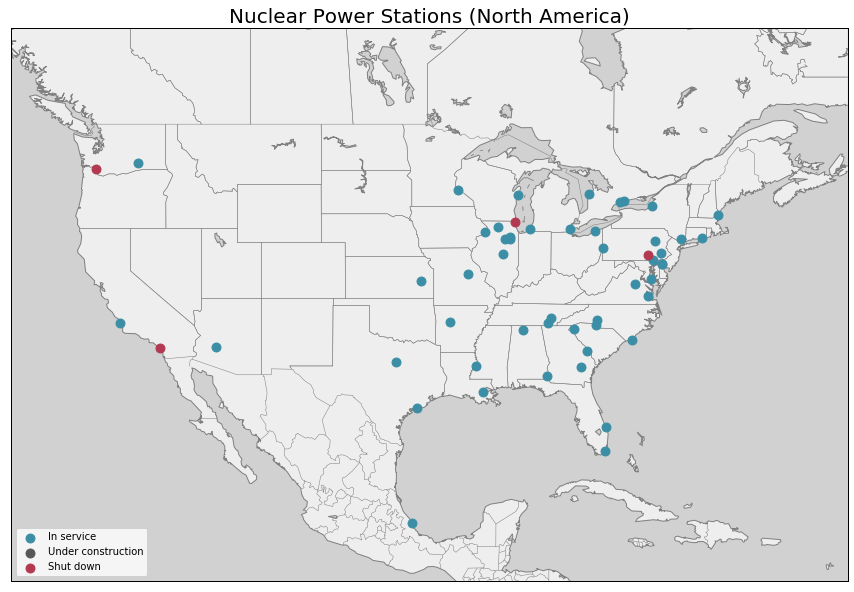

In [10]:
figsize(15,15)

# Draw map
m = Basemap(projection='mill', llcrnrlat=15, urcrnrlat=55, llcrnrlon=-130, urcrnrlon=-60, resolution='l')

# Draw map features
# m.shadedrelief()
m.fillcontinents(color='#EEEEEE',lake_color='#D1D1D1')
m.drawmapboundary(fill_color='#D1D1D1')
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

plt.title("Nuclear Power Stations (North America)", fontsize=20);

m.scatter(lon['in service'], lat['in service'], latlon=True, label='In service', s=80, color=Colors.evidentia_blue, zorder=10);
m.scatter(lon['under construction'], lat['under construction'], latlon=True, label='Under construction', s=80, color='#575757', zorder=10);
m.scatter(lon['shut down'], lat['shut down'], latlon=True, label='Shut down', s=80, color=Colors.evidentia_red, zorder=10);

plt.legend(loc='lower left');

# Save map
plt.savefig('images/north-america.png', bbox_inches='tight')

### Nuclear stations by status (Southeast Asia)

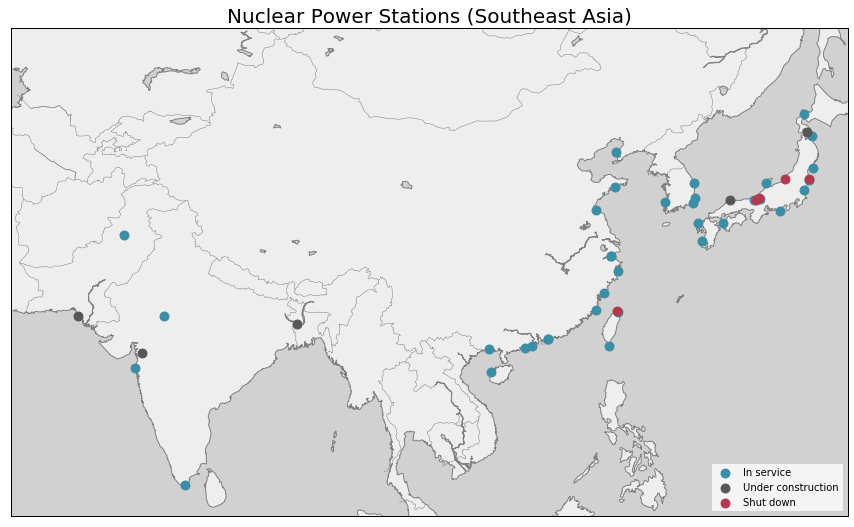

In [11]:
figsize(15,15)

# Draw map
m = Basemap(projection='mill', llcrnrlat=5, urcrnrlat=50, llcrnrlon=60, urcrnrlon=145, resolution='l')

# Draw map features
# m.shadedrelief()
m.fillcontinents(color='#EEEEEE',lake_color='#D1D1D1')
m.drawmapboundary(fill_color='#D1D1D1')
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')

plt.title("Nuclear Power Stations (Southeast Asia)", fontsize=20);

m.scatter(lon['in service'], lat['in service'], latlon=True, label='In service', color=Colors.evidentia_blue, s=80, zorder=10);
m.scatter(lon['under construction'], lat['under construction'], latlon=True, label='Under construction', color='#575757', s=80, zorder=10);
m.scatter(lon['shut down'], lat['shut down'], latlon=True, label='Shut down', color=Colors.evidentia_red, s=80, zorder=10);

plt.legend(loc='lower right');

# Save map
plt.savefig('images/sw-asia.png', bbox_inches='tight')

### In service nuclear stations by installed capacity

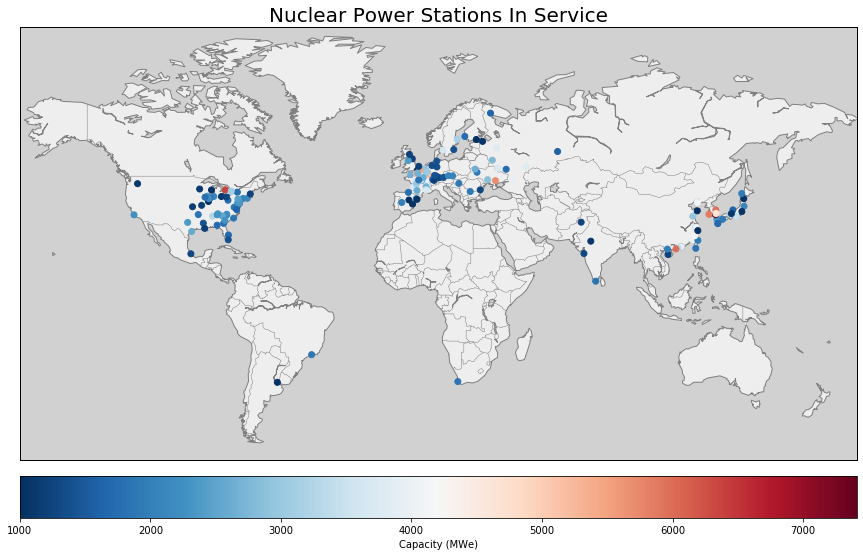

In [35]:
figsize(15,15)

# Draw map
m2 = Basemap(projection='mill',llcrnrlat=-60, urcrnrlat=85, llcrnrlon=-170, urcrnrlon=190, resolution='c')

# Draw map features
# m2.shadedrelief()
m2.fillcontinents(color='#EEEEEE',lake_color='#D1D1D1')
m2.drawmapboundary(fill_color='#D1D1D1')
m2.drawcoastlines(color='gray')
m2.drawcountries(color='gray')

plt.title("Nuclear Power Stations In Service", fontsize=20);

m2.scatter(lon['in service'], lat['in service'], latlon=True, c=cap['in service'], cmap='RdBu_r', zorder=10);

plt.colorbar(label='Capacity (MWe)', orientation='horizontal', pad=0.02);

# Save map
plt.savefig('images/world-in-service-installed.png', bbox_inches='tight')

## Installed capacity by country

In [13]:
import pandas as pd


# Load data into Pandas dataframe
df = pd.read_csv(FULL_DATA, delimiter=';')
df.head()

,name,short_name,country,units,capacity,coordinates,latitude,longitude,coordinates_dms,status,notes
0,Almaraz Nuclear Power Station,Almaraz,Spain,2.0,2017,"-5.69694444444445,39.8080555555556,0",39.808056,-5.696944,39°48′29″N 05°41′49″W,in service,NaN
1,Angra Nuclear Power Station,Angra,Brazil,2.0,1884,"-44.4738888888889,-23.0083333333333,0",-23.008333,-44.473889,23°00′30″S 44°28′26″W,in service,"1,245 MW reactor under construction"
2,Arkansas Nuclear One,ANO,United States,2.0,1839,"-93.2313888888889,35.3102777777778,0",35.310278,-93.231389,35°18′37″N 93°13′53″W,in service,NaN
3,Ascó Nuclear Power Station,Ascó,Spain,2.0,1992,"0.569444444444444,41.2,0",41.200000,0.569444,41°12′00″N 00°34′10″E,in service,NaN
4,Atucha Nuclear Power Station,Atucha,Argentina,2.0,1027,"-59.205,-33.9675,0",-33.967500,-59.205000,33°58′3″S 59°12′18″W,in service,NaN


In [14]:
# Get total capacities by country
capacities = df.groupby(['status', 'country'])['capacity'].sum()
capacities

status              country       
in service          Argentina          1027
                    Belgium            5927
                    Brazil             1884
                    Bulgaria           1906
                    Canada            12990
                    China             41569
                    Czech Republic     4092
                    Finland            2754
                    France            63130
                    Germany            9509
                    Hungary            1889
                    India              4199
                    Japan             25864
                    Mexico             1300
                    Pakistan           1230
                    Romania            1300
                    Russia            26818
                    South Africa       1830
                    South Korea       23812
                    Spain              8921
                    Sweden             8187
                    Switzerland        11

## Power stations in service

In [15]:
# Get stations 'in service' and order by capacity
capacities_service = capacities['in service'].sort_values(ascending=False)

In [16]:
# Function to add value labels to bar plots
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

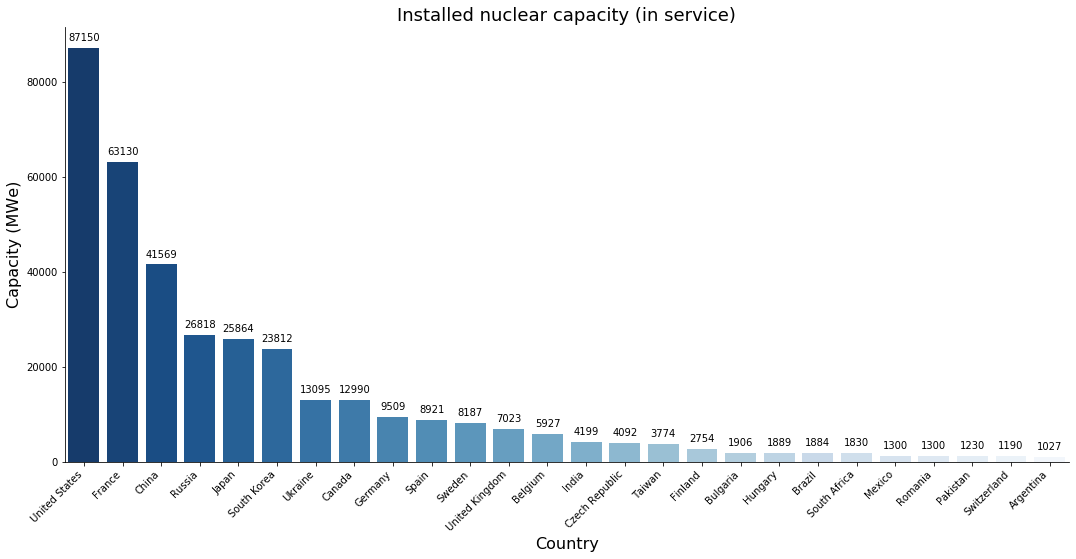

In [17]:
# Plot stations 'in service' capacity 
import seaborn as sns


# from matplotlib import rc
# rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)


figsize(18,8)
ax = sns.barplot(capacities_service.index, capacities_service.values, palette='Blues_r')

# Style the plot
# ax.set(xlabel='Country', ylabel='Capacity (MWe)')
plt.title('Installed nuclear capacity (in service)', fontsize=18)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Capacity (MWe)', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');
sns.despine(bottom=sns.despine(bottom=True, top=True, trim=False)
, top=True, trim=False)
# plt.setp(f.axes, yticks=[])
# plt.tight_layout(h_pad=2)
add_value_labels(ax)

## All power stations (in service, under construction and shut down)

In [18]:
# Make dataframe and convert NaN to zeros
capacities_status = capacities.unstack('status').fillna(0)

# Add total column
capacities_status['total'] = capacities_status.sum(axis=1)

# Order by total and remove 'total' column
capacities_status = capacities_status.sort_values(by='total', ascending=False).drop(columns='total')

In [19]:
# Function to add value labels to bar plots
def add_value_labels_stacked(ax, stacked, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    n_bars = int(len(ax.patches)/stacked)
    y_value_total = [0]*n_bars
    i = 0
    for rect in ax.patches:
        
        # Get Y placement of label from rect.
        y_value = rect.get_height()
        y_value_total[i] = y_value_total[i] + y_value
        
        if (i+1) % n_bars == 0:
            i = 0
        else: 
            i += 1
        
    for j, rect in enumerate(ax.patches):
        if j >= n_bars: break

        # Get X placement of label from rect.
        x_value = rect.get_x() + rect.get_width() / 2
    
        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value_total[j] < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value_total[j])

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value_total[j]),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for positive and negative values.

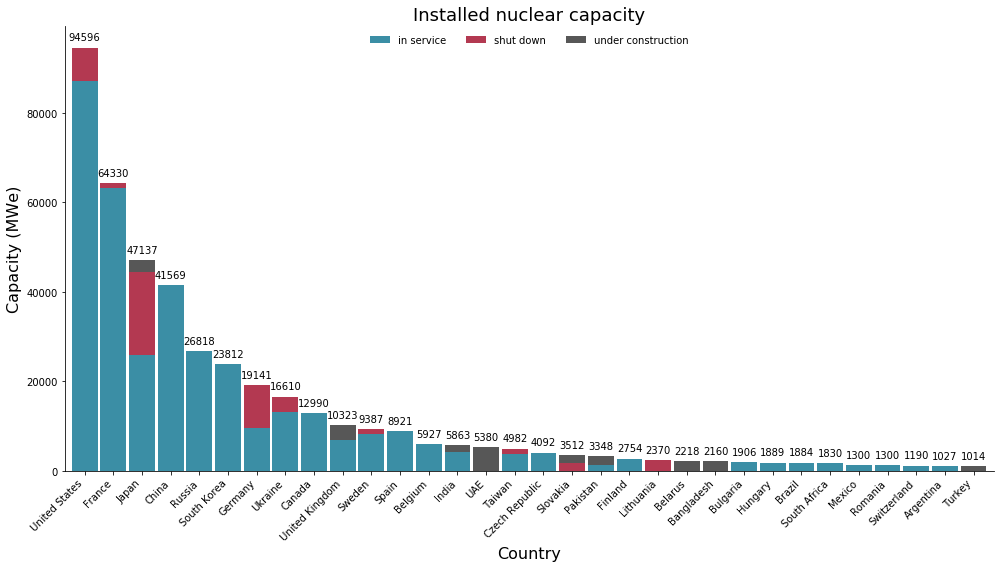

In [20]:
# Plot stations capacity per status
figsize(14,8)

sns.set_palette('muted')

ax2 = capacities_status.plot(kind='bar', stacked=True, width=0.9, color=[Colors.evidentia_blue, Colors.evidentia_red, '#575757']);

# Style the plot
plt.title('Installed nuclear capacity', fontsize=18)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Capacity (MWe)', fontsize=16)
ax2.legend(prop=dict(size=14))
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right');
sns.despine(bottom=False, top=True, trim=False)
# plt.setp(f.axes, yticks=[])
# plt.tight_layout(h_pad=2)
ax2.legend(loc='upper center', ncol=3, frameon=False)
add_value_labels_stacked(ax2, 3)
plt.tight_layout()
plt.savefig('images/installed.png', bbox_inches='tight')

### Add flags 

In [14]:
country_codes2 = {
    'United States': 'US',
    'France': 'FR',
    'China': 'CN',
    'Russia': 'RU',
    'Japan': 'JP',
    'South Korea': 'KR',
    'Ukraine': 'UA',
    'Canada': 'CA',
    'Germany': 'GE',
    'Spain': 'ES',
    'United Kingdom': 'UK',
    'Sweden': 'SE',
    'Belgium': 'BE',
    'India': 'IN',
    'Czech Republic': 'CZ',
    'Taiwan': 'TW',
    'Finland': 'FI',
    'Bulgaria': 'BG',
    'Hungary': 'HU',
    'Brazil': 'BR',
    'South Africa': 'ZA',
    'Mexico': 'MX',
    'Romania': 'RO',
    'Pakistan': 'PK',
    'Switzerland': 'CH',
    'Argentina': 'AR',
    'UAE': 'AE',
    'Slovakia': 'SK',
    'Lithuania': 'LT',
    'Belarus': 'BY',
    'Bangladesh': 'BD',
    'Turkey': 'TR',
}

country_codes3 = {
    'Argentina': 'ARG',
    'Bangladesh': 'BGD',
    'Belarus': 'BLR',
    'Belgium': 'BEL',
    'Brazil': 'BRA',
    'Bulgaria': 'BGR',
    'Canada': 'CAN',
    'China': 'CHN',
    'Czech Republic': 'CZE',
    'Finland': 'FIN',
    'France': 'FRA',
    'Germany': 'DEU',
    'Hungary': 'HUN',
    'India': 'IND',
    'Japan': 'JPN',
    'Lithuania': 'LTU',
    'Mexico': 'MEX',
    'Pakistan': 'PAK',
    'Romania': 'ROU',
    'Russia': 'RUS',
    'Slovakia': 'SVK',
    'South Africa': 'ZAF',
    'South Korea': 'KOR',
    'Spain': 'ESP',
    'Sweden': 'SWE',
    'Switzerland': 'CHE',
    'Taiwan': 'TWN',
    'Turkey': 'TUR',
    'Ukraine': 'UKR',
    'United Arab Emirates': 'ARE',
    'United Kingdom': 'GBR',
    'United States': 'USA'
}

countries = list(country_codes3.keys())

TypeError: 'tuple' object cannot be interpreted as an integer

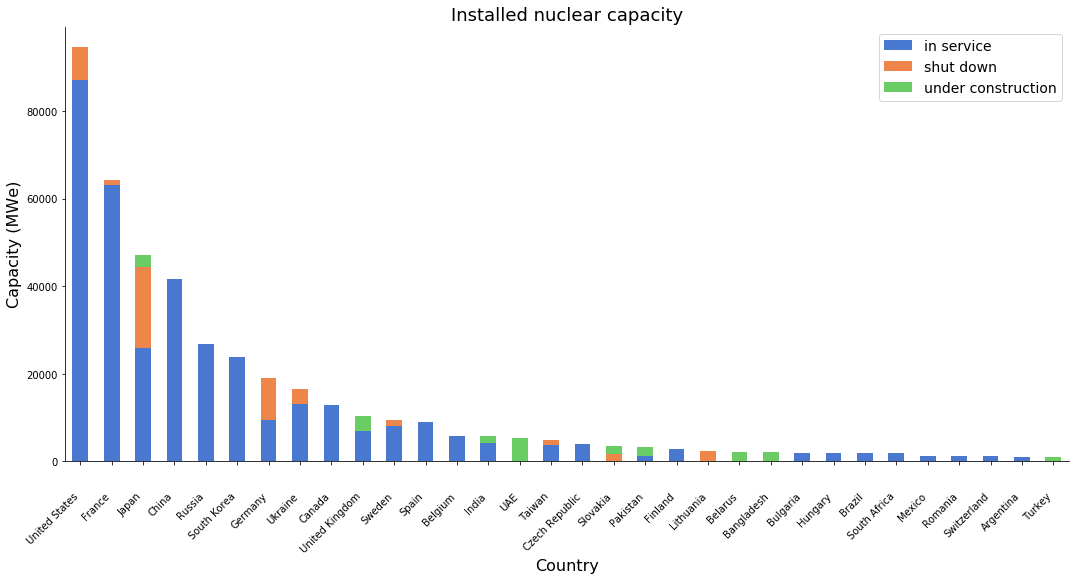

In [15]:
from PIL import Image

figsize(18,8)

sns.set_palette('muted')

ax2 = capacities_status.plot(kind='bar', stacked=True);

# Style the plot
plt.title('Installed nuclear capacity', fontsize=18)
plt.xlabel('Country', fontsize=16)
plt.ylabel('Capacity (MWe)', fontsize=16)
ax2.legend(prop=dict(size=14))
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right');
sns.despine(bottom=False, top=True, trim=False)
# plt.setp(f.axes, yticks=[])
# plt.tight_layout(h_pad=2)


from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def get_flag(name):
    path = f"data/flags-png/{country_codes3[name].lower()}.png"
    im = plt.imread(path)
    im.resize((16, 16), Image.ANTIALIAS)
    return im

def offset_image(coord, name, ax):
    img = get_flag(name)
    im = OffsetImage(img, zoom=0.72)
    im.image.axes = ax

    ab = AnnotationBbox(im, (coord, 0),  xybox=(0., -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)


# fig, ax = plt.subplots()
ax2.tick_params(axis='x', which='major', pad=26)

for i, c in enumerate(countries):
    offset_image(i, c, ax2)